In [13]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
from scipy.stats import boxcox
from statsmodels.tsa.arima.model import ARIMA
%matplotlib inline

In [2]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [3]:
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

In [141]:
trading = pd.read_csv(r'C:\Users\79169\Desktop\домашка\ts\Series\weekly-closings-of-the-dowjones-.csv')

Results of Dickey-Fuller Test:
Test Statistic                  -1.314625
p-value                          0.622455
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


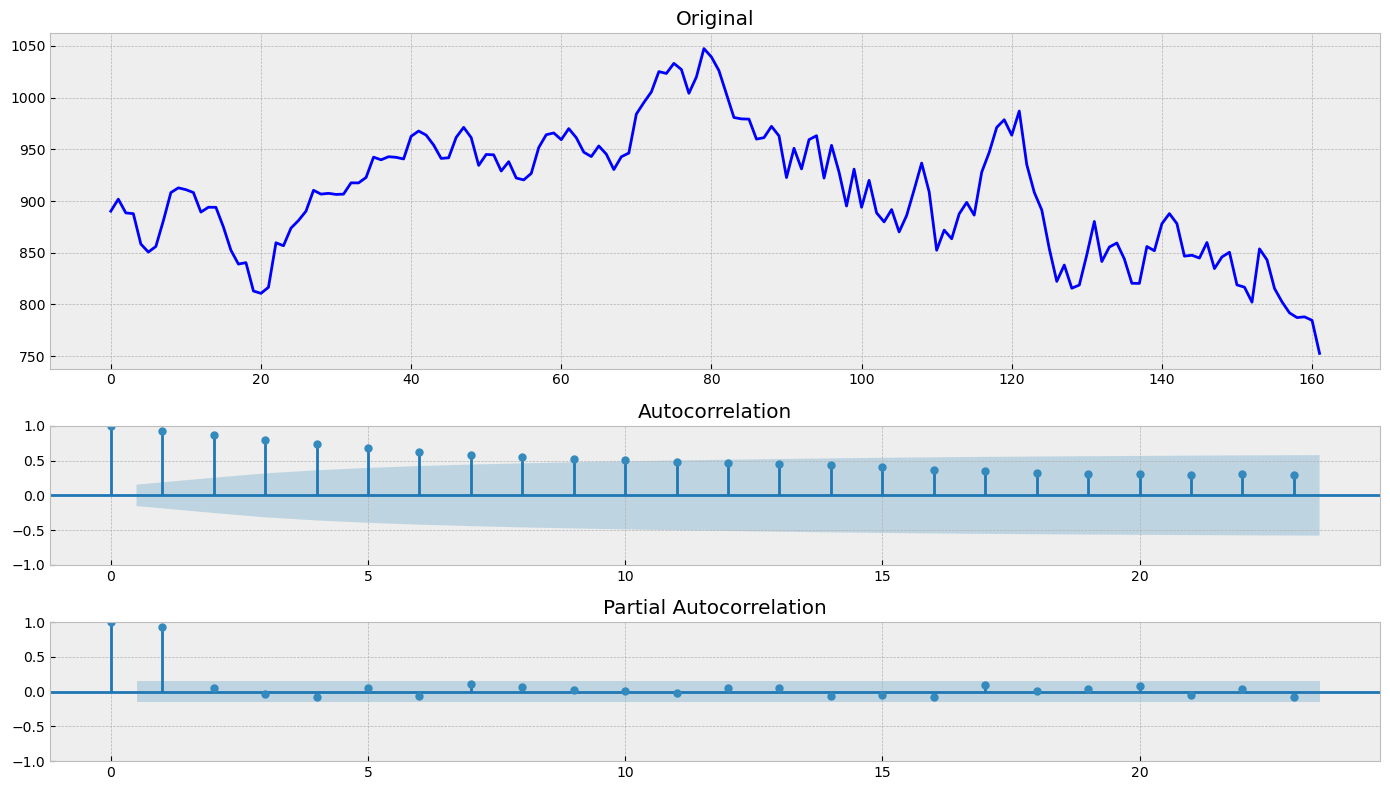

In [135]:
trading = pd.read_csv(r'C:\Users\79169\Desktop\домашка\ts\Series\weekly-closings-of-the-dowjones-.csv')['Close']
tsplot(trading)

In [11]:
train, val = trading[:81], trading[81:]

In [48]:
def mse_cross_val(params):
    errors = []
    p, d, q = map(int, params)
    model = ARIMA(train, order=(p, d, q))
    fit_model = model.fit()
    forecast = fit_model.forecast(steps=len(val))
    mse = np.mean((val - forecast)**2)
    errors.append(mse)
    mean_error = np.mean(errors)
    print(f'{mean_error}------------')
    return mean_error

Подберем оптимальные коэффициенты для ARIMA

In [81]:
opt = minimize(mse_cross_val, x0=[0,0,0], method="COBYLA", bounds = [(1, 10), (1, 10), (1, 10)])

5410.094940606------------
11423.380695883174------------
27031.4011333333------------
5339.328458545127------------
5339.328458545127------------
26329.443541072------------
26329.443541072------------
5410.094940606------------
26308.209090001128------------


c:\Users\79169\anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\79169\anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\79169\anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


5335.421631890658------------
7927.221113261747------------
5335.421631890658------------
5335.421631890658------------


c:\Users\79169\anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\79169\anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


7927.221113261747------------
7927.221113261747------------
5335.421631890658------------
7927.221113261747------------


c:\Users\79169\anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


7927.221113261747------------
26308.209090001128------------
7927.221113261747------------
7927.221113261747------------
7927.221113261747------------
7927.221113261747------------
7927.221113261747------------
7927.221113261747------------
5335.421631890658------------


c:\Users\79169\anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


7927.221113261747------------
7927.221113261747------------
7927.221113261747------------
5335.421631890658------------


c:\Users\79169\anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


7927.221113261747------------
7927.221113261747------------
26308.209090001128------------
7927.221113261747------------
7927.221113261747------------
7927.221113261747------------
7927.221113261747------------
7927.221113261747------------
5335.421631890658------------
7927.221113261747------------


c:\Users\79169\anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [95]:
optimal_params = opt.x
print(opt)

 message: Optimization terminated successfully.
 success: True
  status: 1
     fun: 7927.221113261747
       x: [ 1.000e+00  1.000e+00  2.552e+00]
    nfev: 40
   maxcv: 1.1102230246251565e-16


In [97]:
p, d, q = map(int, optimal_params)
final_model = ARIMA(trading, order=(p, d, q))
fit_final_model = final_model.fit()

In [98]:
forecast = fit_final_model.forecast(steps=len(val))

In [99]:
resid = pd.Series(fit_final_model.resid)
resid 

0       0.634698
1      11.637193
2     -12.481439
3      -1.657878
4     -28.798503
         ...    
157   -13.185980
158    -8.361598
159    -3.391702
160    -7.593949
161   -36.720478
Length: 162, dtype: float64

Посмотрим на распределение остатков

Results of Dickey-Fuller Test:
Test Statistic                -1.235724e+01
p-value                        5.650098e-23
#Lags Used                     0.000000e+00
Number of Observations Used    1.610000e+02
Critical Value (1%)           -3.471633e+00
Critical Value (5%)           -2.879665e+00
Critical Value (10%)          -2.576434e+00
dtype: float64


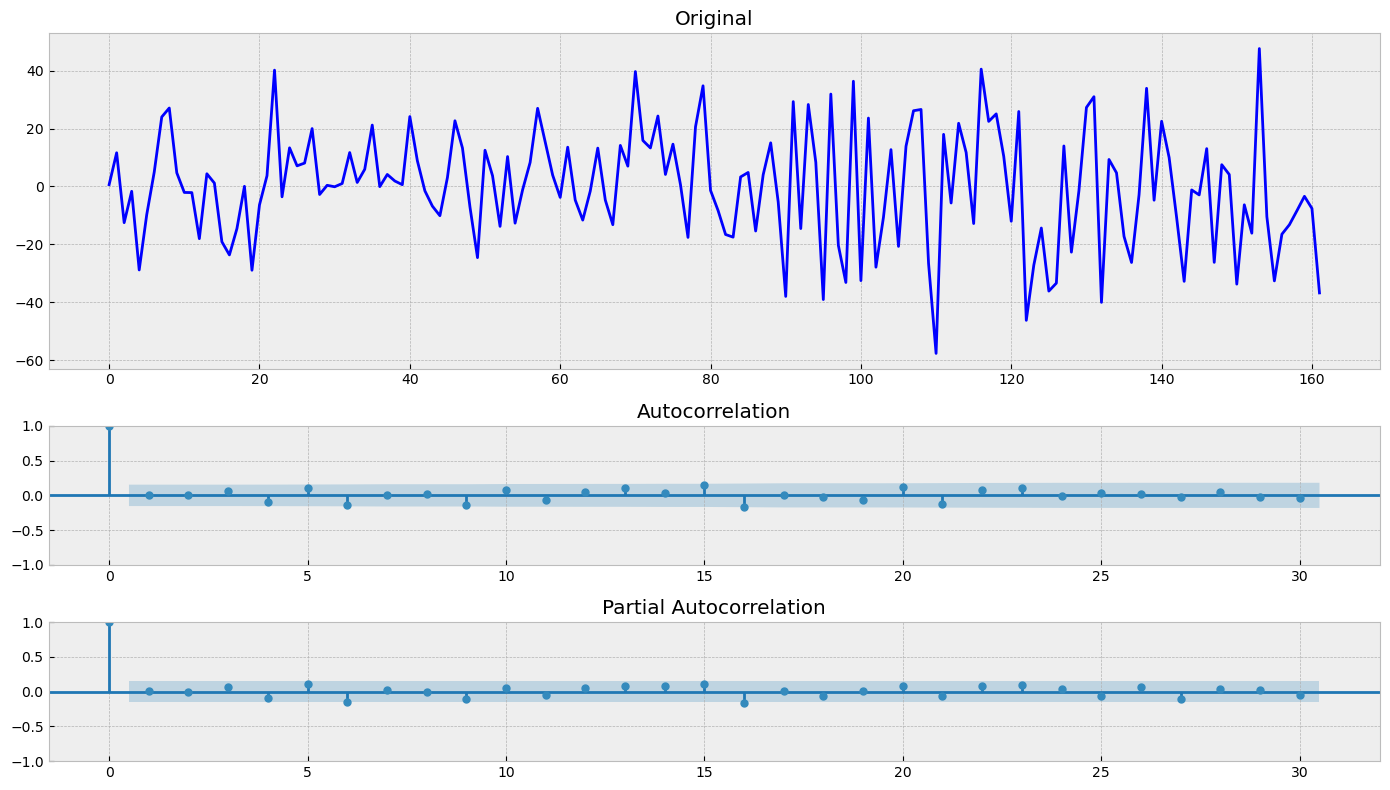

In [100]:
tsplot(resid, lags=30)

График остатков стационарен - модель подходит для анализа нашего ряда

In [126]:
forecast_results = fit_final_model.get_forecast(steps=len(trading))

# Получим прогнозы и интервалы доверия
forecast_values = forecast_results.predicted_mean
conf_int = forecast_results.conf_int()
conf_int

,lower Close,upper Close
162,720.716120,797.569515
163,710.505315,815.657331
164,704.908365,832.706725
165,701.574773,846.974241
166,699.612752,859.375143
...,...,...
319,756.548533,1022.378424
320,756.552688,1022.382584
321,756.556655,1022.386556
322,756.560442,1022.390347


Построим результаты предсказаний

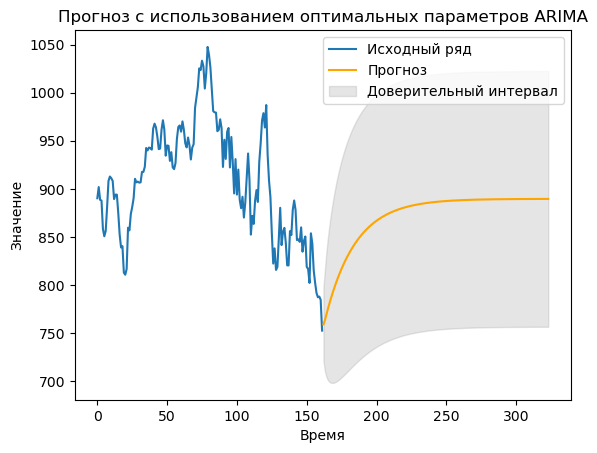

In [131]:
plt.plot(trading, label='Исходный ряд')
plt.plot(range(len(trading), len(trading) + len(forecast_values)), forecast_values, label='Прогноз', color='orange')
plt.fill_between(range(len(trading), len(trading) + len(forecast_values)), conf_int['lower Close'], conf_int['upper Close'], color='gray', alpha=0.2, label='Доверительный интервал')
plt.title('Прогноз с использованием оптимальных параметров ARIMA')
plt.xlabel('Время')
plt.ylabel('Значение')
plt.legend()
plt.show()

Как мы видим, согласно прогнозу тренд поменяется, но предсказания на 150+ недель (в изначальном наборе данных были недели, но удалены) неясны и выходят на плато

Построим прогнозы с помощью классического мл (взят катбуст регрессор)

In [168]:
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error

In [142]:
trading 

,Week,Close
0,1971-W27,890.19
1,1971-W28,901.80
2,1971-W29,888.51
3,1971-W30,887.78
4,1971-W31,858.43
...,...,...
157,1974-W28,791.77
158,1974-W29,787.23
159,1974-W30,787.94
160,1974-W31,784.57


Ввведем единицу времени lag - 1 неделя

In [144]:
lag = 1
trading['lag'] = trading['Close'].shift(lag)


In [147]:
trading.drop(['Week'], axis=1) 

,Close,lag
0,890.19,NaN
1,901.80,890.19
2,888.51,901.80
3,887.78,888.51
4,858.43,887.78
...,...,...
157,791.77,802.41
158,787.23,791.77
159,787.94,787.23
160,784.57,787.94


In [192]:

trading  = trading.dropna()
train, test = train_test_split(trading, test_size=0.2, shuffle=False)
X_train, y_train = train[['lag']], train['Close']
X_test, y_test = test[['lag']], test['Close']

model = CatBoostRegressor(iterations=10, 
                          depth=8, 
                          learning_rate=1, 
                          loss_function='RMSE',
                          random_seed=12)
model.fit(X_train, y_train)


predictions = model.predict(X_test)


mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

0:	learn: 21.0669658	total: 1.15ms	remaining: 10.4ms
1:	learn: 17.9235914	total: 2.25ms	remaining: 8.98ms
2:	learn: 17.4808081	total: 3.15ms	remaining: 7.36ms
3:	learn: 16.9015558	total: 4.02ms	remaining: 6.03ms
4:	learn: 16.3103224	total: 4.87ms	remaining: 4.87ms
5:	learn: 15.8534925	total: 5.72ms	remaining: 3.81ms
6:	learn: 15.4618195	total: 6.58ms	remaining: 2.82ms
7:	learn: 15.0615453	total: 7.43ms	remaining: 1.86ms
8:	learn: 14.2815531	total: 8.37ms	remaining: 929us
9:	learn: 13.8147224	total: 9.27ms	remaining: 0us
Mean Squared Error: 865.0573771031296


Построим 95% доверительный интервал

In [193]:
residuals = y_test - predictions
std_residuals = np.std(residuals)
z_score = 1.96
conf_int_lower = predictions - z_score * std_residuals
conf_int_upper = predictions + z_score * std_residuals

Визуализируем предсказания

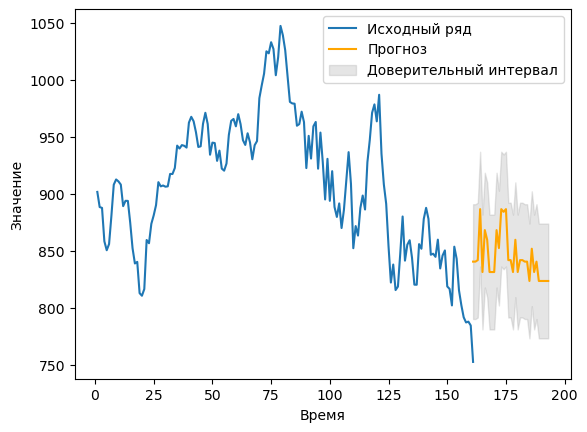

In [191]:
plt.plot(trading['Close'], label='Исходный ряд')
plt.plot(range(len(trading['Close']), len(trading['Close']) + len(predictions)), predictions, label='Прогноз', color='orange')
plt.fill_between(range(len(trading['Close']), len(trading['Close']) + len(predictions)),
                 conf_int_lower, conf_int_upper, color='gray', alpha=0.2, label='Доверительный интервал')
plt.xlabel('Время')
plt.ylabel('Значение')
plt.legend()
plt.show()

Как мы видим, модель примерно также предсказала направление дальнейшего тренда,сделала она это менее аккуратно (не соединила исходный ряд и прогноз), но зато интересен дальнейший график - в отличии от АРИМы